I- Import the Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


II- Load Data 

In [2]:
df = pd.read_csv('C:/Users/alcat/Downloads/EPSI Toulouse/Cours ESPI/Machine Learning/TP/TP K_MEANS/Mall_Customers.csv')
print("Shape ot the data = ", df.shape)
df.head()

Shape ot the data =  (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


III- Understanding The data 

Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

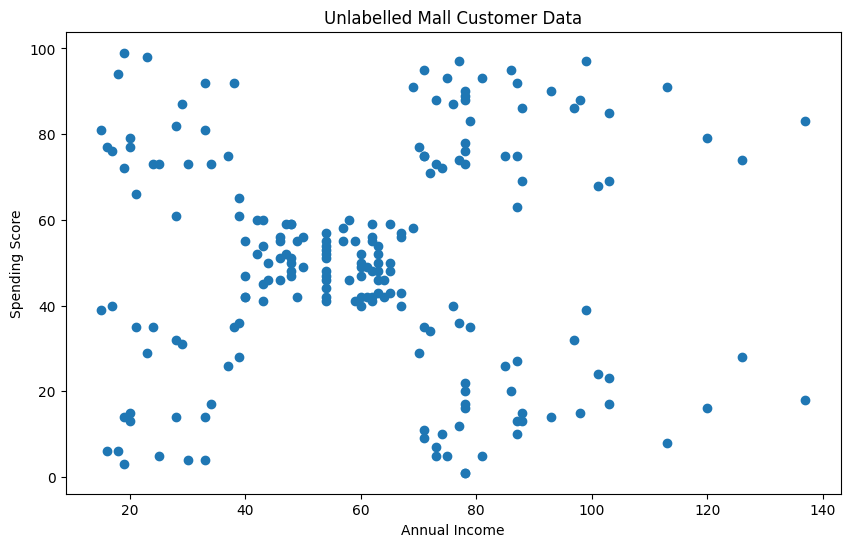

In [3]:
plt.figure(figsize = (10,6))
plt.scatter( df ['Annual Income (k$)'], df ['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')


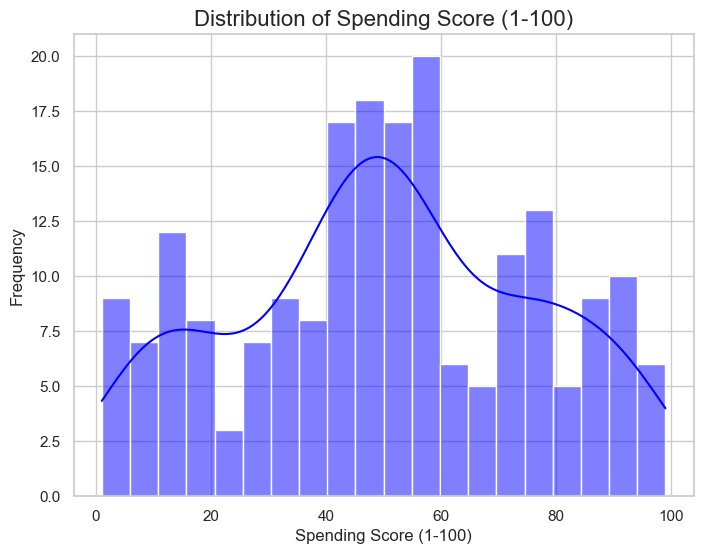

C:\Users\alcat\AppData\Local\Temp\ipykernel_12632\733310678.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, palette="Set2")


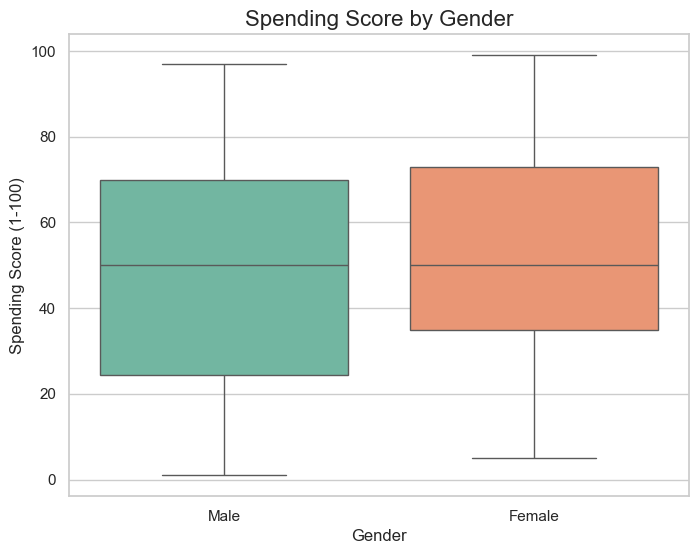

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

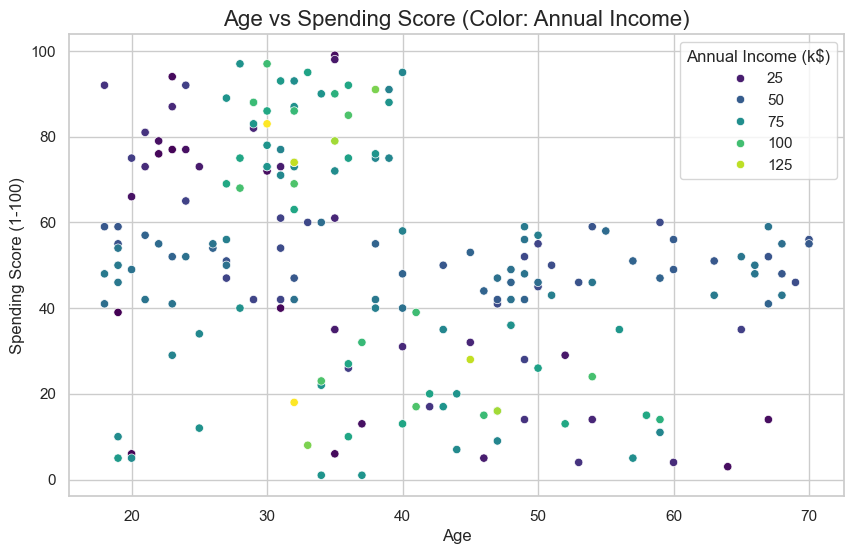

In [4]:

# Set up the visualization style
sns.set(style="whitegrid")

# Distribution of Spending Score (Target variable)
plt.figure(figsize=(8,6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Spending Score (1-100)', fontsize=16)
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Box plot to show relation between Genre and Spending Score
plt.figure(figsize=(8,6))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, palette="Set2")
plt.title('Spending Score by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.show()

# Scatter plot to visualize relationship between Age, Annual Income, and Spending Score
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Annual Income (k$)', palette='viridis', data=df)
plt.title('Age vs Spending Score (Color: Annual Income)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.colorbar(label='Annual Income (k$)')
plt.show()


In [5]:
# Since we are going to use Annual Income and Spending Score Columns only 
X = df.iloc[:, [3,4]].values
X[:5] # Show first 5 records only 

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Automatically created module for IPython interactive environment
 For n_clusters = 2  The average silhouette_score is :  0.7049787496083262
 For n_clusters = 3  The average silhouette_score is :  0.5882004012129721
 For n_clusters = 4  The average silhouette_score is :  0.6505186632729437
 For n_clusters = 5  The average silhouette_score is :  0.561464362648773
 For n_clusters = 6  The average silhouette_score is :  0.4857596147013469


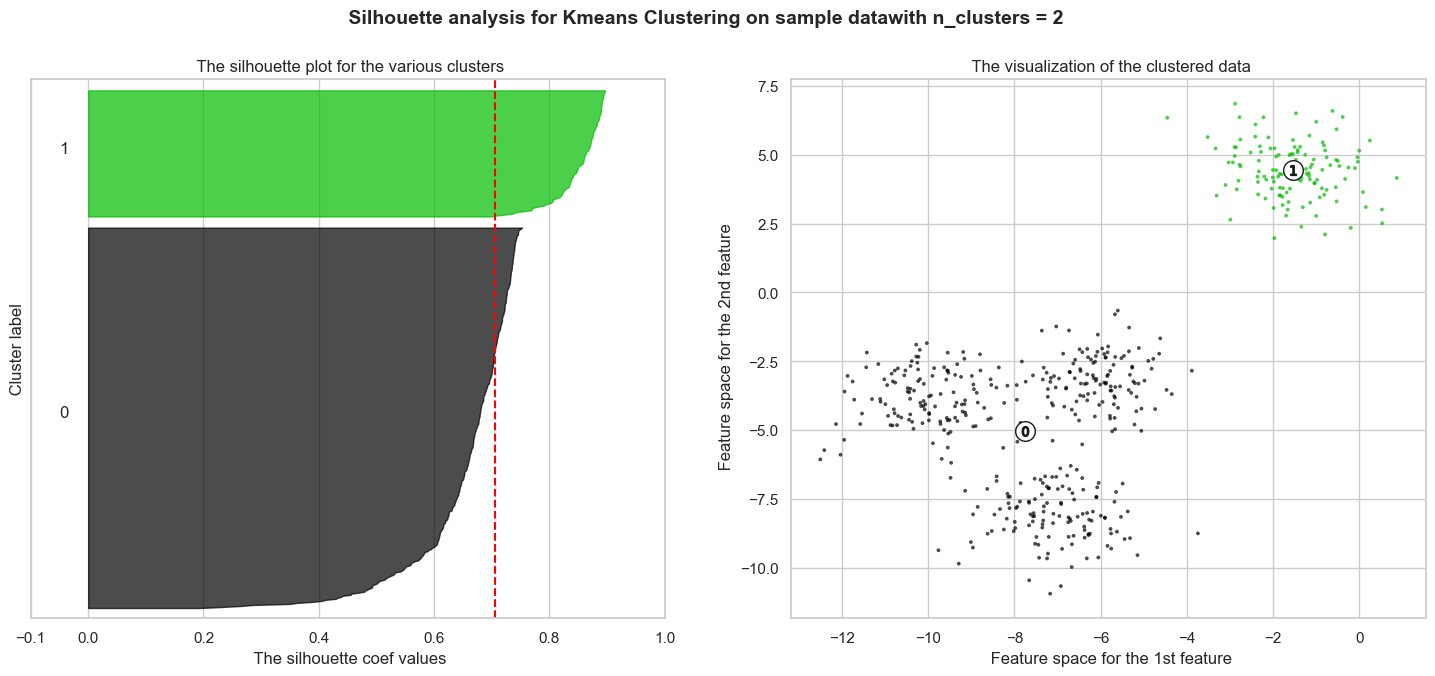

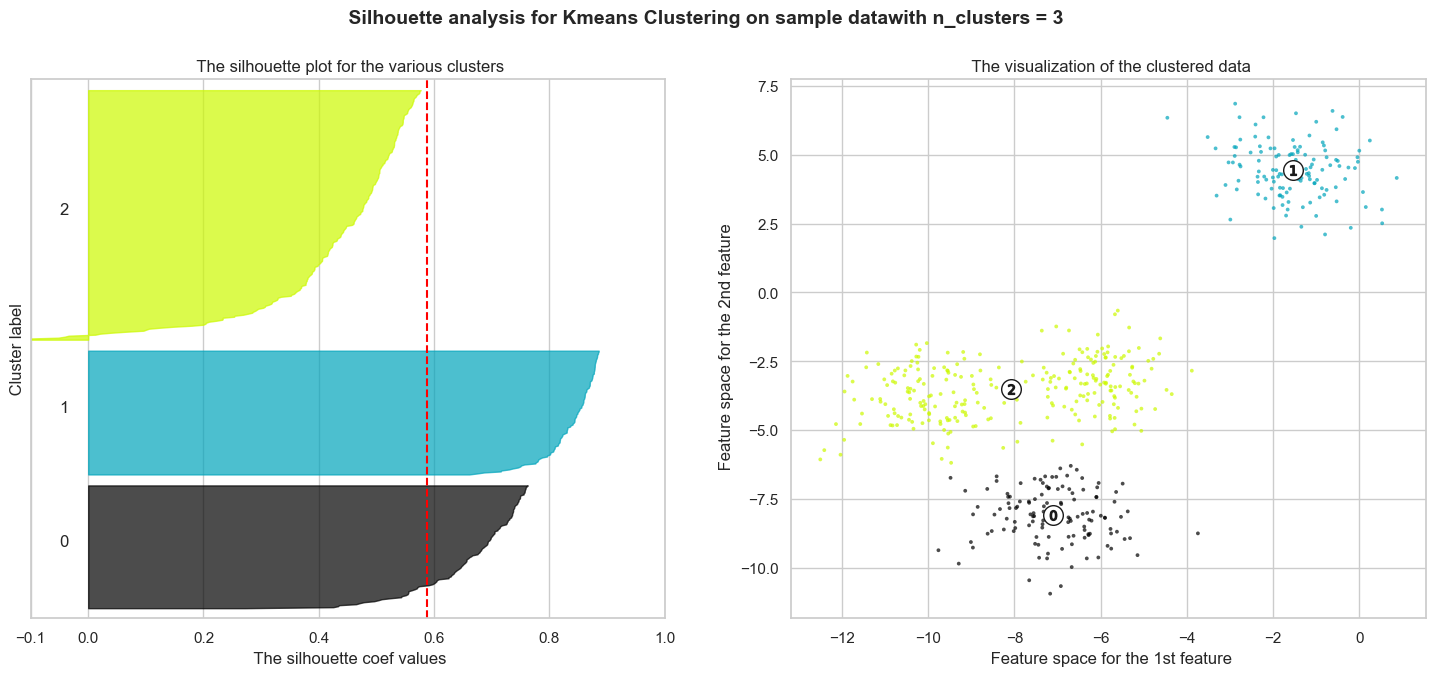

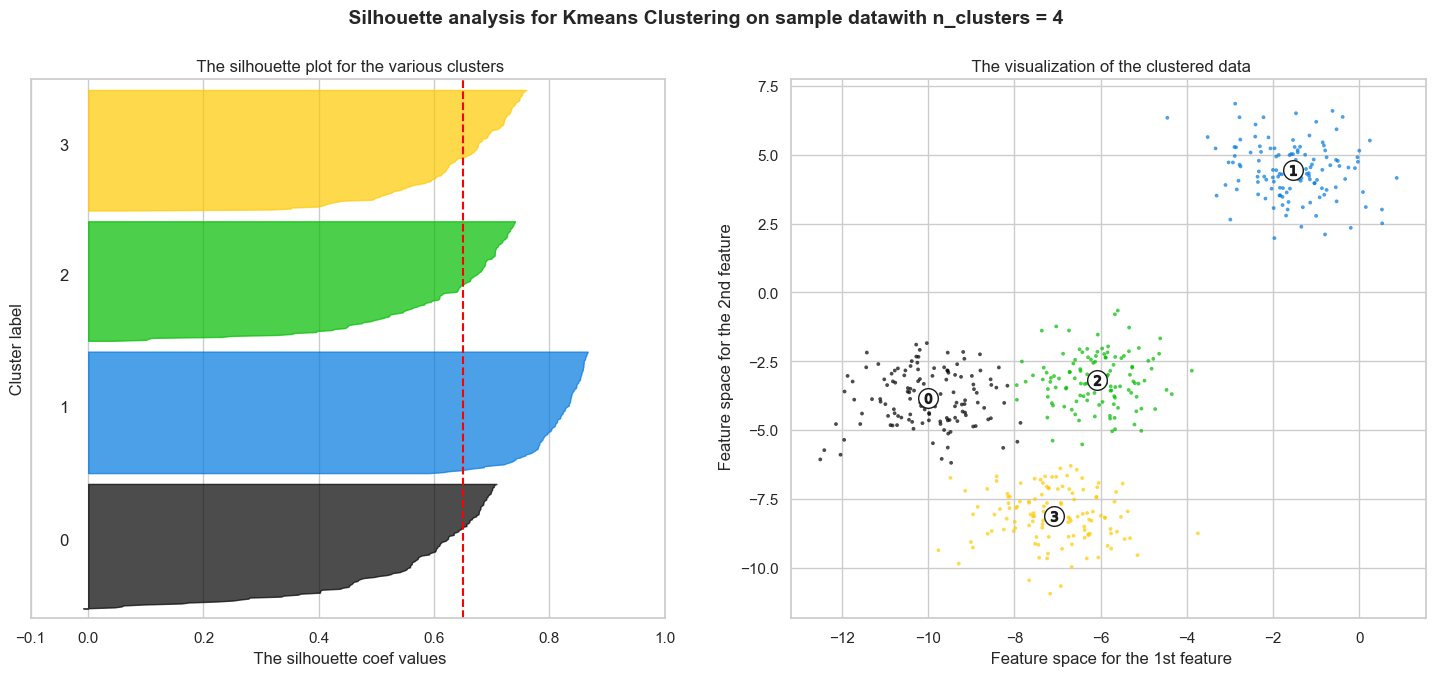

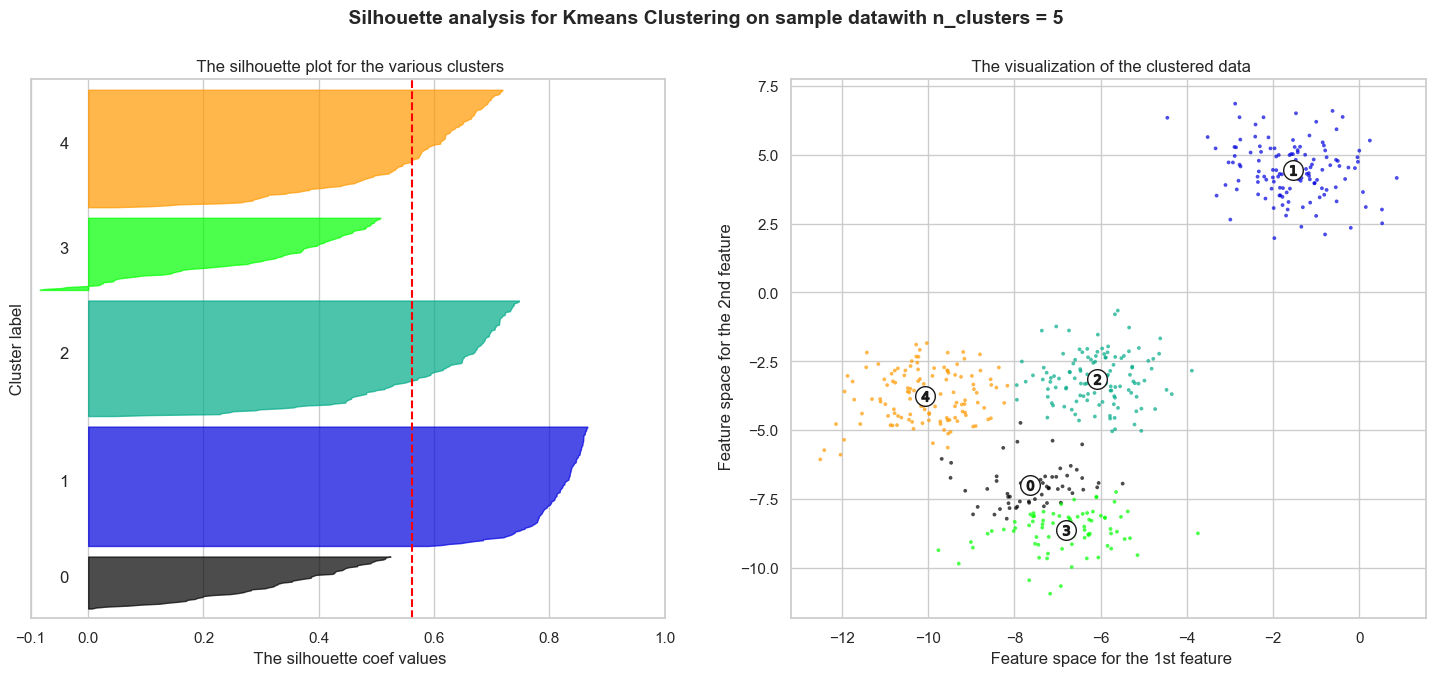

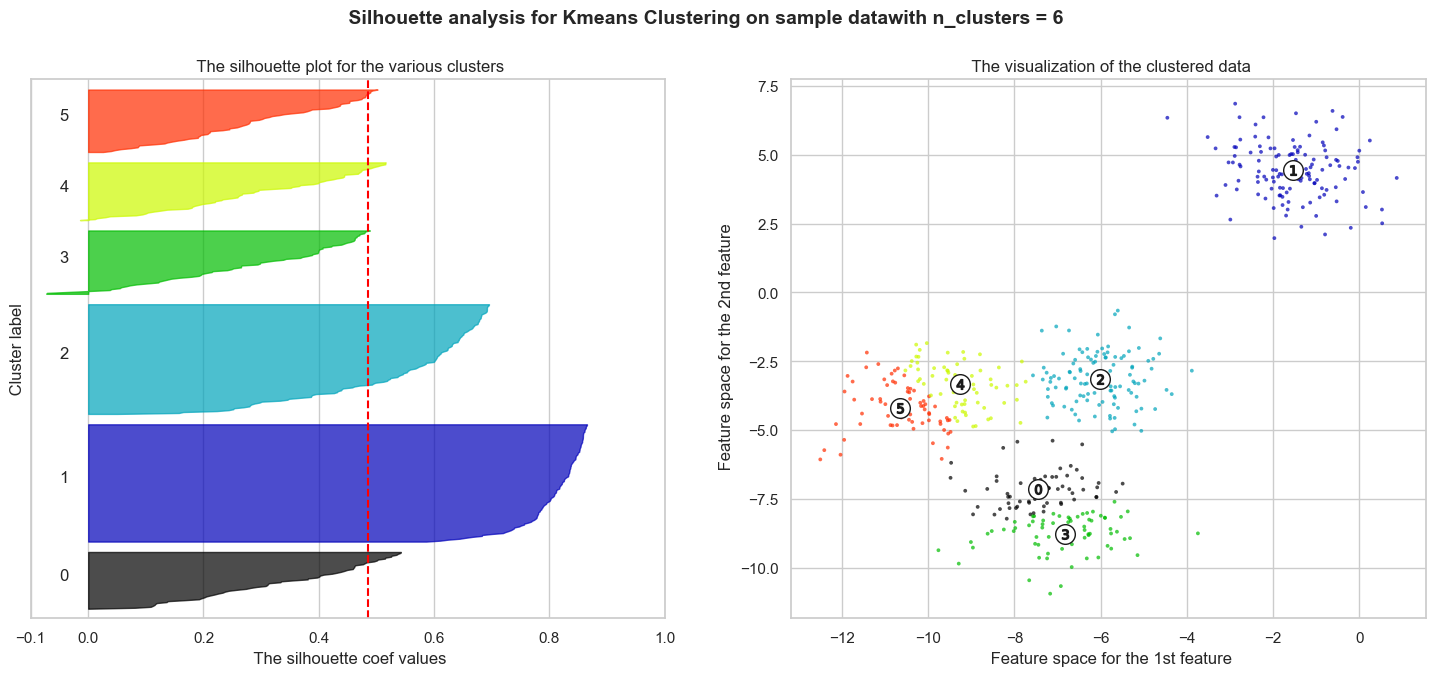

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

print(__doc__)

# Generating the sample data from make_blobs 
# This particular setting has one distinct cluster and 3 clusters places close together

X,y = make_blobs ( n_samples= 500, n_features= 2, centers= 4, cluster_std=1, center_box= (-10.0, 10.0), shuffle=True, random_state=1) # for reproducibility
range_n_clusters=[2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
 # Create a subplot with 1 row and 2 columns
 fig, (ax1,ax2)= plt.subplots(1,2)
 fig.set_size_inches(18,7)

 # The 1st subplot is the silhouette plot
 # The silhouette coef can range from -1, 1 but in this example all lie within [-0.1, 1]
 ax1.set_xlim([-0.1,1])

 # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demorcate them clearly.
 ax1.set_ylim([0, len(X) + (n_clusters + 1 ) * 10 ])
 
 # Initialize the clusterr with n_clusters value and a random generator seed of 10 for reproducibility 
 clusterer = KMeans(n_clusters=n_clusters, random_state=10)
 cluster_labels = clusterer.fit_predict(X)

 # The silhouette_score gives the average value for value for all the samples.
 # This gives a perspective into the density and separation of the formed clusters 

 silhouette_avg = silhouette_score(X, cluster_labels)
 print(" For n_clusters =", n_clusters, " The average silhouette_score is : ", silhouette_avg)

 # Compute the silhouette scores for each sample 

 sample_silhouette_values = silhouette_samples(X, cluster_labels)

 y_lower = 10 
 for i in range(n_clusters) : 

  # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
  ith_cluster_silhouette_values = \
  sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

  # Label the silhouette plot with their cluster numbers at the middle 
  ax1.text(-0.05, y_lower +0.5 * size_cluster_i, str(i))

  # compute the new y_lower for the next plot
  y_lower = y_upper +10 # 10 for the 0 sample

 ax1.set_title (" The silhouette plot for the various clusters")
 ax1.set_xlabel (" The silhouette coef values")
 ax1.set_ylabel (" Cluster label ")

 # The vertical line for average silhouette score of all the value
 ax1.axvline(x=silhouette_avg, color= "red", linestyle= "--")
 ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 ax1.set_yticks([])

 # 2nd plot showing the actual clusters formed 
 colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
 ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0, alpha=0.7, c= colors, edgecolor='k')

 # labeling the clusters 
 centers = clusterer.cluster_centers_
 # Draw white circles at cluster centers
 ax2.scatter(centers[:,0], centers[:,1], marker='o', c="white", alpha=1, s=200, edgecolor='k')



 for i, c in enumerate(centers) : 
  ax2.scatter(c[0], c[1], marker='$%d$' %i, alpha=1, s=50, edgecolor='k')
  ax2.set_title(" The visualization of the clustered data")
  ax2.set_xlabel(" Feature space for the 1st feature")
  ax2.set_ylabel(" Feature space for the 2nd feature")
  plt.suptitle ((" Silhouette analysis for Kmeans Clustering on sample data" "with n_clusters = %d " % n_clusters), fontsize = 14, fontweight='bold')
plt.show()

IV- Elbow Method 

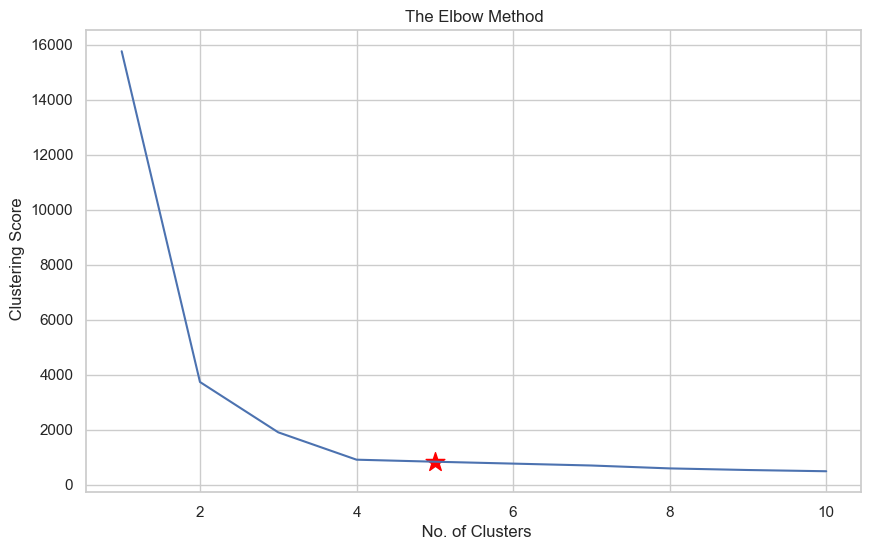

In [10]:
clustering_score=[]

for i in range(1,11):
 kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42 )
 kmeans.fit(X)
 clustering_score.append(kmeans.inertia_) #inertia_ = Sum of squared distance 
 
plt.figure(figsize=(10,6))
plt.plot(range(1,11), clustering_score)
plt.scatter(5, clustering_score[4], s=200, c='red', marker='*')
plt.title('The Elbow Method')
plt.xlabel(' No. of Clusters')
plt.ylabel(' Clustering Score')
plt.show()


V- Compute K-Means Clustering

In [11]:
kmeans = KMeans(n_clusters= 5, random_state= 42 )

# Compute K-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample
pred=kmeans.predict(X)

df['cluster'] = pd.DataFrame(pred, columns=['cluster'])
print (' Number of data points in each cluster = \n', df['cluster'].value_counts())
df

 Number of data points in each cluster = 
 cluster
3    54
1    50
0    45
2    29
4    22
Name: count, dtype: int64


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


VI- Visualization

Text(0.5, 1.0, 'Customer Clusters')

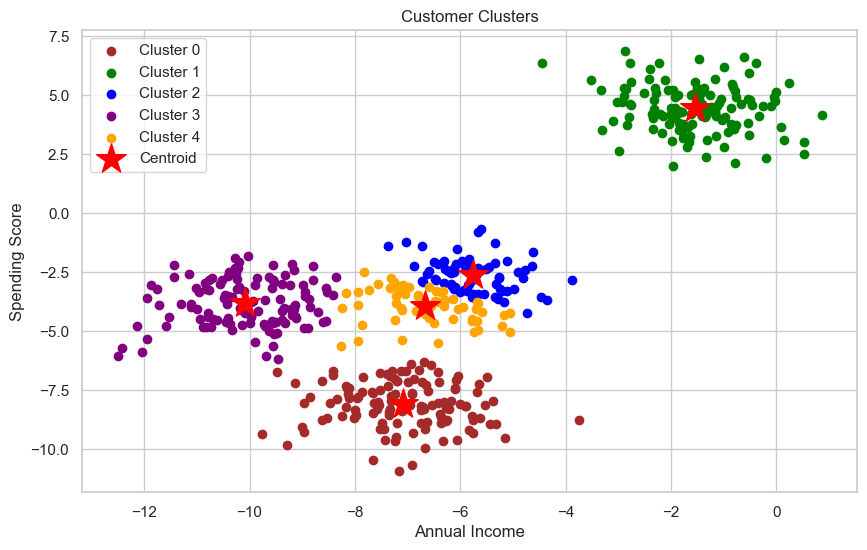

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')
#plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c = 'red', label = 'Cluster 5')
#plt.scatter(X[pred == 6, 0], X[pred == 6, 1], c = 'yellow', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 500, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')